In [2]:
# import important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from matplotlib import rcParams
import warnings

warnings.filterwarnings("ignore")

# figure size in inches
rcParams["figure.figsize"] = 10, 6
np.random.seed(42)

## 1. Load Dataset
- Load the `pima_indians_diabetes` dataset
- Check the first five samples. Are there any categorical features?
- Is this a classification or regression problem?
- Check the columns of the dataset

 There are  8 input variables and 1 output variable. Missing values are believed to be encoded with zero values. The variable names are as follows:

- Number of times pregnant.
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
- Diastolic blood pressure (mm Hg).
- Triceps skinfold thickness (mm).
- 2-Hour serum insulin (mu U/ml).
- Body mass index (weight in kg/(height in m)^2).
- Diabetes pedigree function.
- Age (years).
- Class variable (0 or 1).

In [3]:
# Load dataset

data_df = pd.read_csv("pima_indians_diabetes.csv")

In [4]:
# Load sample of the dataset

data_df.sample(5)

,time_pregnant_no,plasma_concentration,diastolic_blood_pressure,triceps_skinfold_thickness,serum_insulin,bmi,diabetes_pedigree,age,class
668,6,98,58,33,190,34.0,0.430,43,0
324,2,112,75,32,0,35.7,0.148,21,0
624,2,108,64,0,0,30.8,0.158,21,0
690,8,107,80,0,0,24.6,0.856,34,0
473,7,136,90,0,0,29.9,0.210,50,0


In [5]:
# Columns

data_df.columns

Index(['time_pregnant_no', 'plasma_concentration', 'diastolic_blood_pressure',
       'triceps_skinfold_thickness', 'serum_insulin', 'bmi',
       'diabetes_pedigree', 'age', 'class'],
      dtype='object')

## 2. Data Preprocessing and Model
- Assign features to `X` and target variable to `y`
- Create a pipeline for preprocessing which includes imputing and standardscaling
- Create a pipeline for preprocessor and the random forest classifier. Set `n_estimators=100`
- Train the model and make your predictions on the test dataset
- List the feature importance and the corresponding features
- Create a bar plot for the feature importances
- Drop the least important feature from the data and repeat the steps above

In [6]:
# Split the dataset into features and target variables

X = data_df.drop("class", axis = 1)
y = data_df["class"]

In [8]:
# Create the classifier

classifier = RandomForestClassifier(n_estimators=100)
preprocessor=Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

clf = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', classifier)])

# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(
    X,y, stratify=y, test_size=0.1, random_state=42)

# Train model on training sets

clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                 ('scaler', StandardScaler())])),
                ('classifier', RandomForestClassifier())])

In [9]:
# Make prediction on the test set

y_pred = clf.predict(X_test)

In [10]:
# Calculate Accuracy of Model

print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.8051948051948052


In [12]:
# Check Feature Importance

feature_importance_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": clf["classifier"].feature_importances_}
).sort_values("importance", ascending =False)

# Display results

feature_importance_df

,feature,importance
1,plasma_concentration,0.265153
5,bmi,0.152950
7,age,0.142551
6,diabetes_pedigree,0.120932
2,diastolic_blood_pressure,0.083460
0,time_pregnant_no,0.082878
4,serum_insulin,0.078441
3,triceps_skinfold_thickness,0.073634


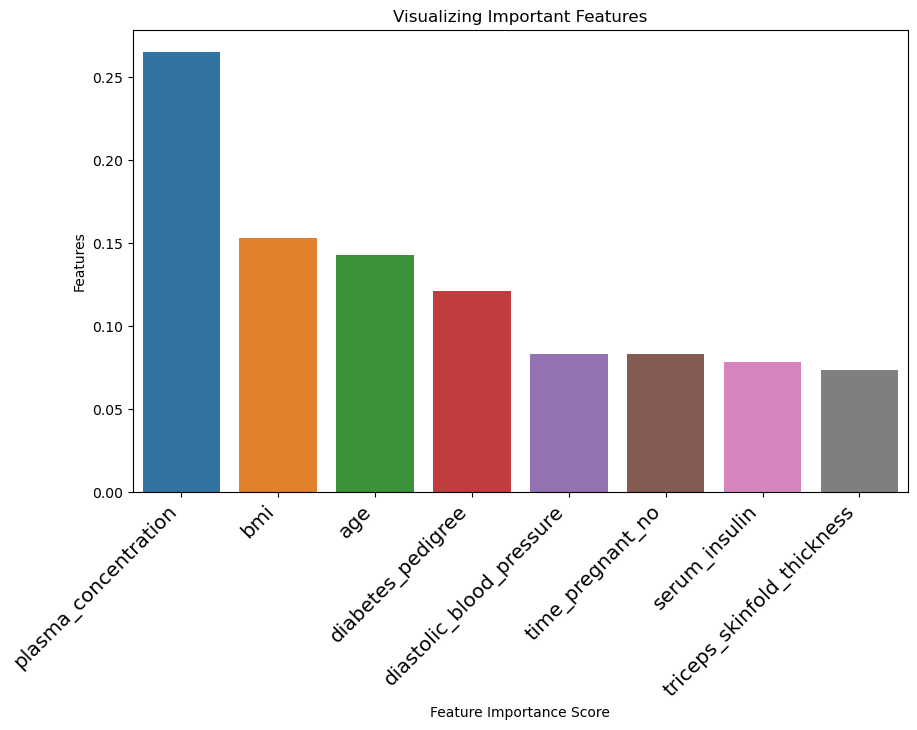

In [14]:
# Create a Bar Chart of Important Features

sns.barplot(x=feature_importance_df.feature, y=feature_importance_df.importance)

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large")
plt.show()

## Run the classifer on selected features

In [16]:
# Drop least important feature

X = data_df.drop(["class", "triceps_skinfold_thickness"], axis=1)
y = data_df["class"]

In [17]:
# Split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.1, random_state=42)

# Train model on training sets

clf.fit(X_train, y_train)

# Predict on test set

y_pred = clf.predict(X_test)

# Calculate Model Accuracy

print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.8311688311688312
